In [14]:
import tensorflow as tf
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow import keras 
from sklearn.model_selection import TimeSeriesSplit


,Close,Volume
Date,,
2014-04-28 00:00:00-04:00,34.608917,50610200
2014-04-29 00:00:00-04:00,34.304070,29636200
2014-04-30 00:00:00-04:00,34.210915,35458700
2014-05-01 00:00:00-04:00,33.872200,28787400
2014-05-02 00:00:00-04:00,33.609688,43416600


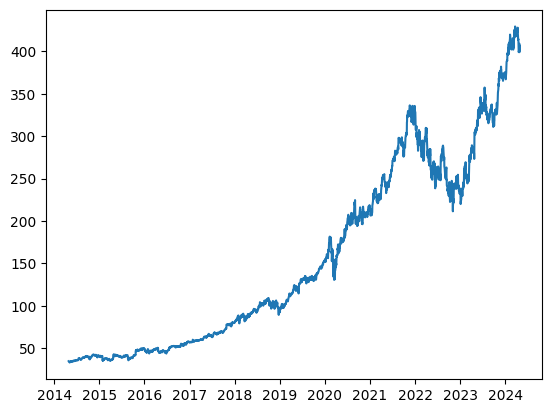

In [30]:
msft = yf.Ticker("MSFT")

hist = msft.history(period="10y")

hist = hist.drop(columns=["Open", "High", "Low","Stock Splits", "Dividends"])
hist.head()
plot = plt.plot(hist["Close"])

hist.head()

## Dividing data into training and test

In [23]:
ts_cv = TimeSeriesSplit(
    n_splits=10,  # to keep the notebook fast enough on common laptops
    gap=48  # 2 days data gap between train and test  # for 2 or 3 digits of precision in scores
)
all_splits = list(ts_cv.split(hist, hist["Close"] ))
train_idx, test_idx = all_splits[0]
X_train, X_test = hist.iloc[train_idx], hist.iloc[test_idx]
y_train, y_test = hist["Close"].iloc[train_idx], hist["Close"].iloc[test_idx]


## Recuring Nueral Network - Long short term memory layers
Sequential - linear layers.  
Dense: standard NN layer
LSTM:layer used for time series data
Dropout: randomly ignore neurons to avoid overfitting

In [24]:

model = keras.models.Sequential() 
model.add(keras.layers.LSTM(units=64, 
                            return_sequences=True, 
                            input_shape=(X_train.shape[1], 1))) 
model.add(keras.layers.LSTM(units=64)) 
model.add(keras.layers.Dense(32)) 
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(1)) 
model.summary 

/Users/natebowers/Documents/ATCS/TradingML/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<bound method Model.summary of <Sequential name=sequential, built=True>>

In [26]:
model.compile(optimizer='adam', 
              loss='mean_squared_error') 
history = model.fit(X_train, 
                    y_train, 
                    epochs=100)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 58.9865
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65.6611 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 63.8816 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.0933 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70.7295 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.1365 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.4467 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.1190 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.2037 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.7160 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.3028 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.6317 
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.9884 
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49.5896 
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48.1248 
Epoch

## Making Predictions

In [28]:
# predict the testing data 
predictions = model.predict(X_test) 
#predictions = scaler.inverse_transform(predictions) 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [36]:
print(X_train)

                               Close     Volume
Date                                           
2014-04-28 00:00:00-04:00  34.608917   50610200
2014-04-29 00:00:00-04:00  34.304062   29636200
2014-04-30 00:00:00-04:00  34.210922   35458700
2014-05-01 00:00:00-04:00  33.872200   28787400
2014-05-02 00:00:00-04:00  33.609688   43416600
...                              ...        ...
2015-01-21 00:00:00-05:00  39.652710   39081100
2015-01-22 00:00:00-05:00  40.697575   35898000
2015-01-23 00:00:00-05:00  40.740753   26211600
2015-01-26 00:00:00-05:00  40.593937   42525500
2015-01-27 00:00:00-05:00  36.837654  169164000

[190 rows x 2 columns]


In [42]:
y_train[1]

/var/folders/9x/hp4yd9t517q0b2m13pghld080000gn/T/ipykernel_16404/2767619509.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train[1]


34.30406188964844

In [46]:
X_train.index

DatetimeIndex(['2014-04-28 00:00:00-04:00', '2014-04-29 00:00:00-04:00',
               '2014-04-30 00:00:00-04:00', '2014-05-01 00:00:00-04:00',
               '2014-05-02 00:00:00-04:00', '2014-05-05 00:00:00-04:00',
               '2014-05-06 00:00:00-04:00', '2014-05-07 00:00:00-04:00',
               '2014-05-08 00:00:00-04:00', '2014-05-09 00:00:00-04:00',
               ...
               '2015-01-13 00:00:00-05:00', '2015-01-14 00:00:00-05:00',
               '2015-01-15 00:00:00-05:00', '2015-01-16 00:00:00-05:00',
               '2015-01-20 00:00:00-05:00', '2015-01-21 00:00:00-05:00',
               '2015-01-22 00:00:00-05:00', '2015-01-23 00:00:00-05:00',
               '2015-01-26 00:00:00-05:00', '2015-01-27 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=190, freq=None)

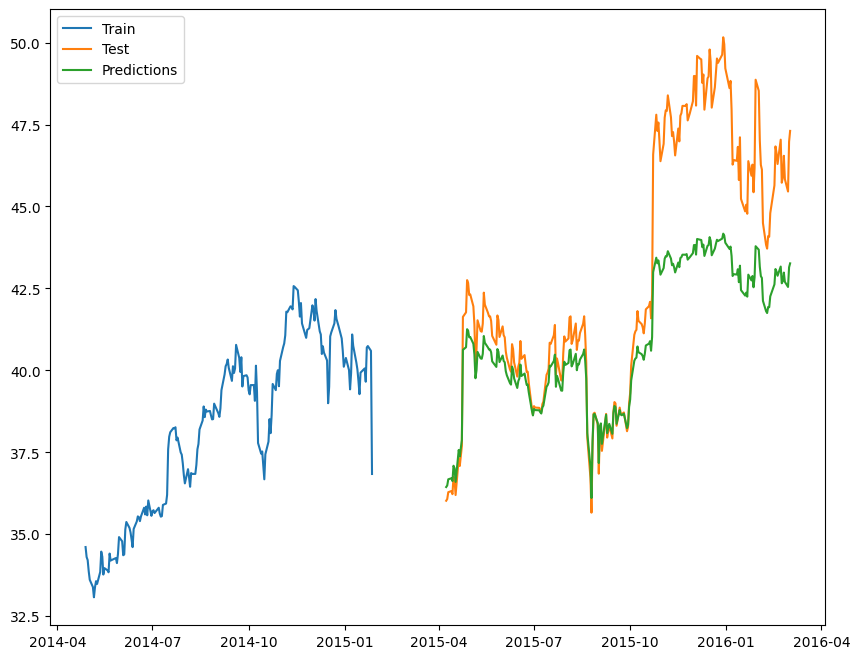

In [50]:
  
plt.figure(figsize=(10, 8)) 
plt.plot(X_train.index, y_train) 
plt.plot(X_test.index, y_test) 
plt.plot(X_test.index, predictions) 
plt.legend(['Train', 'Test', 'Predictions']) 

